In [35]:
import zipfile
import io

zip_file_path = '/content/archive.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_data')



In [36]:
import os

extracted_dir = '/content/extracted_data'
extracted_files = os.listdir(extracted_dir)
print(extracted_files)


['OR Fuzzy.xlsx', 'XOR Fuzzy.xlsx', 'AND Fuzzy.xlsx', 'NOT Fuzzy.xlsx', 'Implication Fuzzy.xlsx']


In [37]:
!pip install openpyxl

In [38]:
import pandas as pd

file_path = '/content/extracted_data/Implication Fuzzy.xlsx'
df = pd.read_excel(file_path)

df.head(2)

,Unnamed: 0,X1,X2,Target
0,0,0.486028,0.551844,1
1,1,0.280018,0.087141,1


In [39]:
df1 = pd.read_excel('/content/extracted_data/XOR Fuzzy.xlsx')
df1.head(2)

,Unnamed: 0,X1,X2,Target
0,0,0.591408,0.615619,0
1,1,0.131830,0.346367,0


In [40]:
df2 = pd.read_excel('/content/extracted_data/OR Fuzzy.xlsx')
df2.head(2)

,Unnamed: 0,X1,X2,Target
0,0,0.094879,0.743880,1
1,1,0.937657,0.085146,1


In [41]:
df3 = pd.read_excel('/content/extracted_data/AND Fuzzy.xlsx')
df3.head(2)

,Unnamed: 0,X1,X2,Target
0,0,0.840287,0.330545,0
1,1,0.410047,0.225367,0


In [42]:
df4 = pd.read_excel('/content/extracted_data/NOT Fuzzy.xlsx')
df4.head(2)

,Unnamed: 0,X1,Target
0,0,0.334536,1
1,1,0.529101,0


In [43]:
print('ROWS: ', df.shape[0])
print('COLUMNS: ', df.shape[1])

ROWS:  1000
COLUMNS:  4


In [44]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
Target        0
dtype: int64

In [45]:
df["Target"].value_counts()

1    750
0    250
Name: Target, dtype: int64

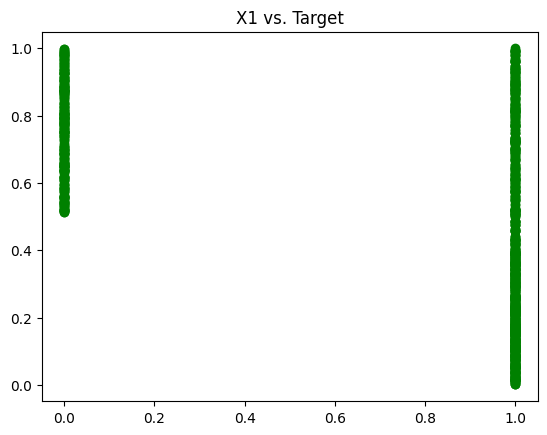

In [46]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Target'],y=df['X1'], color='g')
plt.title("X1 vs. Target");

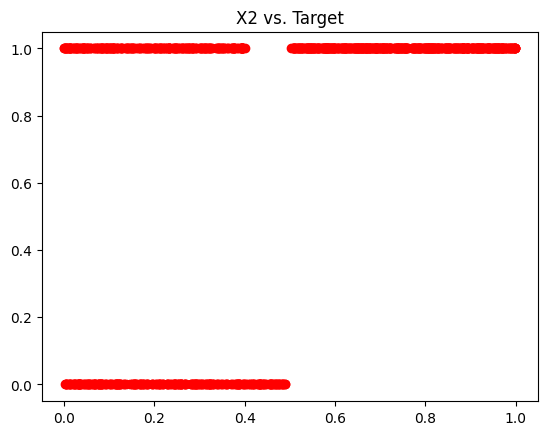

In [47]:
plt.scatter(x=df['X2'],y=df['Target'], color='r')
plt.title("X2 vs. Target");

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xone = df["X1"].values.reshape(-1, 1)

targ = df["Target"].values.reshape(-1, 1)

sx= scaler.fit_transform(xone)
sy = scaler.fit_transform(targ)

scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test = train_test_split(sx,sy,test_size=0.20,random_state=13)
scaled_x_train.shape,scaled_x_test.shape

((800, 1), (200, 1))

In [49]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes':[(3,3),(3,),(3,3,3)],
          'activation':['logistic','relu','tanh'],
          'solver':['sgd','lbfgs','adam'],'verbose':[0],'max_iter':[10000]}

mlp_grid = GridSearchCV(estimator=MLPRegressor(),param_grid=params)
mlp_grid.fit(scaled_x_train,scaled_y_train.ravel())
GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'hidden_layer_sizes': [(3, 3), (3,), (3, 3, 3)],
                         'max_iter': [10000],
                         'solver': ['sgd', 'lbfgs', 'adam'], 'verbose': [0]})

GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'hidden_layer_sizes': [(3, 3), (3,), (3, 3, 3)],
                         'max_iter': [10000],
                         'solver': ['sgd', 'lbfgs', 'adam'], 'verbose': [0]})

In [50]:
y_predict = mlp_grid.predict(scaled_x_test)
y_predict_orig = scaler.inverse_transform(scaled_x_test)
y_test_orig = scaler.inverse_transform(scaled_y_test)

In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.703 
MSE = 0.4942584178876619 
MAE = 0.6506655701183937 
R2 = -1.5689106958818186


In [52]:
import pandas as pd

file_path = '/content/extracted_data/Implication Fuzzy.xlsx'
df = pd.read_excel(file_path)

columns_to_check = ['X1', 'X2']

df['min_value'] = df[columns_to_check].min(axis=1)

df_nsmallest = df.nsmallest(2, 'min_value')

df_nsmallest = df_nsmallest.drop(columns=['min_value'])

print(df_nsmallest)

     Unnamed: 0        X1        X2  Target
536         536  0.207550  0.000712       1
254         254  0.132341  0.001053       1


In [53]:
import pandas as pd

file_path = '/content/extracted_data/AND Fuzzy.xlsx'
df = pd.read_excel(file_path)

columns_to_check = ['X1', 'X2']

df['min_value'] = df[columns_to_check].min(axis=1)

df_nsmallest = df.nsmallest(2, 'min_value')

df_nsmallest = df_nsmallest.drop(columns=['min_value'])

print(df_nsmallest)

     Unnamed: 0        X1        X2  Target
864         864  0.000062  0.693205       0
363         363  0.000650  0.348090       0


In [54]:
import pandas as pd

file_path = '/content/extracted_data/OR Fuzzy.xlsx'
df = pd.read_excel(file_path)

columns_to_check = ['X1', 'X2']

df['min_value'] = df[columns_to_check].min(axis=1)

df_nsmallest = df.nsmallest(2, 'min_value')

df_nsmallest = df_nsmallest.drop(columns=['min_value'])

print(df_nsmallest)

     Unnamed: 0        X1        X2  Target
765         765  0.002257  0.991614       1
441         441  0.451138  0.002806       0


In [55]:
import pandas as pd

file_path = '/content/extracted_data/NOT Fuzzy.xlsx'
df = pd.read_excel(file_path)

column_name = 'X1'

df_nsmallest = df.nsmallest(2, column_name)
print(df_nsmallest)

     Unnamed: 0        X1  Target
210         210  0.000593       1
229         229  0.001876       1


In [56]:
import pandas as pd

file_path = '/content/extracted_data/XOR Fuzzy.xlsx'
df = pd.read_excel(file_path)

columns_to_check = ['X1', 'X2']

df['min_value'] = df[columns_to_check].min(axis=1)

df_nsmallest = df.nsmallest(2, 'min_value')

df_nsmallest = df_nsmallest.drop(columns=['min_value'])

print(df_nsmallest)

     Unnamed: 0        X1        X2  Target
274         274  0.000067  0.894287       1
622         622  0.618487  0.000428       1


In [67]:
import numpy as np
scaler = MinMaxScaler()
X = df[['X1', 'X2']]
y = df['Target']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=13)

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

param_grid = {
    'hidden_layer_sizes': [(3, 3), (3,), (3, 3, 3)],
    'activation': ['logistic', 'relu', 'tanh'],
    'solver': ['sgd', 'lbfgs', 'adam'],
    'max_iter': [10000],
    'verbose': [0]
}

mlp_grid = GridSearchCV(estimator=MLPRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
mlp_grid.fit(X_train, y_train)

y_pred_train = mlp_grid.predict(X_train)
y_pred_test = mlp_grid.predict(X_test)

scaler.fit(y.values.reshape(-1, 1))
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_train_orig = scaler.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_orig = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

rmse_train = sqrt(mean_squared_error(y_train_orig, y_pred_train_orig))
rmse_test = sqrt(mean_squared_error(y_test_orig, y_pred_test_orig))

mse_train = mean_squared_error(y_train_orig, y_pred_train_orig)
mse_test = mean_squared_error(y_test_orig, y_pred_test_orig)

mae_train = mean_absolute_error(y_train_orig, y_pred_train_orig)
mae_test = mean_absolute_error(y_test_orig, y_pred_test_orig)

r2_train = r2_score(y_train_orig, y_pred_train_orig)
r2_test = r2_score(y_test_orig, y_pred_test_orig)

print("Train RMSE:", rmse_train, "Test RMSE:", rmse_test)
print("Train MSE:", mse_train, "Test MSE:", mse_test)
print("Train MAE:", mae_train, "Test MAE:", mae_test)
print("Train R2:", r2_train, "Test R2:", r2_test)

Train RMSE: 0.03235934456311484 Test RMSE: 0.014881915410094778
Train MSE: 0.00104712718055439 Test MSE: 0.00022147140627321642
Train MAE: 0.006556836340226179 Test MAE: 0.0043263569427105875
Train R2: 0.9958112556609133 Test R2: 0.9991133163596309


In [68]:
param_grid = {
    'hidden_layer_sizes': [(5, 5), (5,), (5, 5, 5)],
    'activation': ['logistic', 'relu', 'tanh'],
    'solver': ['sgd', 'lbfgs', 'adam'],
    'max_iter': [10000],
    'verbose': [0]
}

mlp_grid = GridSearchCV(estimator=MLPRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
mlp_grid.fit(X_train, y_train)

y_pred_train = mlp_grid.predict(X_train)
y_pred_test = mlp_grid.predict(X_test)

y_pred_train_orig = scaler.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_orig = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

rmse_train = sqrt(mean_squared_error(y_train_orig, y_pred_train_orig))
rmse_test = sqrt(mean_squared_error(y_test_orig, y_pred_test_orig))

print("Updated Train RMSE:", rmse_train, "Updated Test RMSE:", rmse_test)

Updated Train RMSE: 0.016915780275869517 Updated Test RMSE: 0.10904320076673661
